# Q6

Import some prerequisites:

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [34]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Here is for your helper functions(optional).

In [35]:
def forpadding(img):
    padding=np.pad(img,pad_width=((1,1),(1,1)), mode='symmetric')
    return padding

Implement this function to get the input image and return the skeleton of the input image.

In [36]:
def dilate(img, kernel): 
    '''
    Dialates image with given kernel.

    Parameters:
        img (np.ndarray): The image to dialate.
        kernel (np.ndarray): The kernel to dialate image with.

    Returns:
        np.ndarray: The dialated image.
    '''
    #pixel black if at least one of 1s in kernel is black
    def dilate_utilization(ar,k):
        f=0
        for i in range(len(ar)):
            for j in range(len(ar[0])):
                if k[i,j]==1 and ar[i,j]==0:
                    f=1
        if f==0:
            return 255
        else:
            return 0  
        
    #make img to binary
    _,thr=cv2.threshold(img,100,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #add padding
    image=forpadding(thr)
    img_dialated=np.zeros(thr.shape)
    #iterate on image
    for i in range(0,len(image)-2):
        for j in range(0,len(image[0])-2):
            img_dialated[i,j]=dilate_utilization(image[i:i+2,j:j+2],kernel)
        
        
    return img_dialated

Test implementation

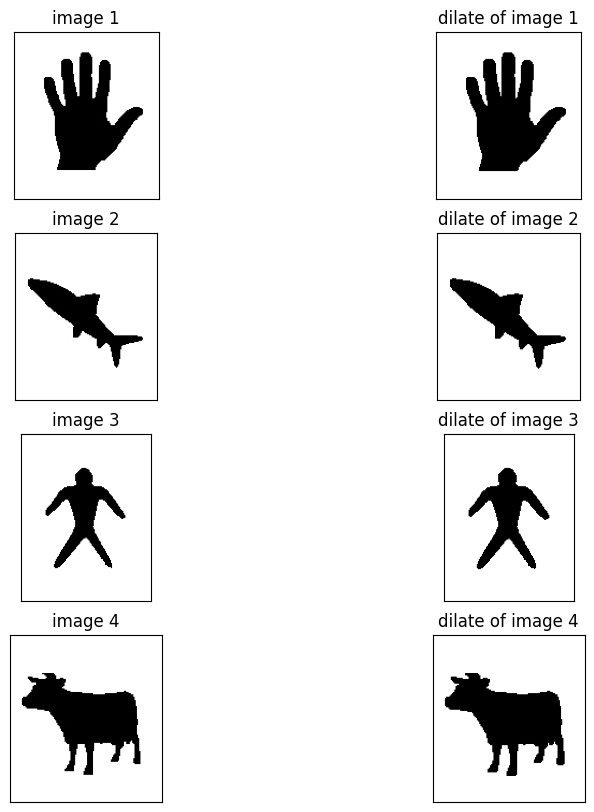

In [37]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-dilate')

In [38]:
def erode(img, kernel): 
    '''
    Erodes image with given kernel.

    Parameters:
        img (np.ndarray): The image to erode.
        kernel (np.ndarray): The kernel to erode image with.

    Returns:
        np.ndarray: The eroded image.
    '''
    # like entire func in dilate
    def e_utilization(ar,k):
        f=1
        for i in range(len(ar)):
            for j in range(len(ar[0])):
                if k[i,j]==1 and ar[i,j]!=0:
                    f=0
        if f==0:
            return 255
        else:
            return 0  
    #binary it
    _,thr=cv2.threshold(img,100,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #add padding
    img_1=forpadding(thr)                
    
    img_eroded = np.zeros(img.shape)
    #iterate on image
    for i in range(0,len(img_1)-2):
        for j in range(0,len(img_1[0])-2):
            img_eroded[i,j] = e_utilization(img_1[i:i+2,j:j+2],kernel)
    return img_eroded

Test your implementation

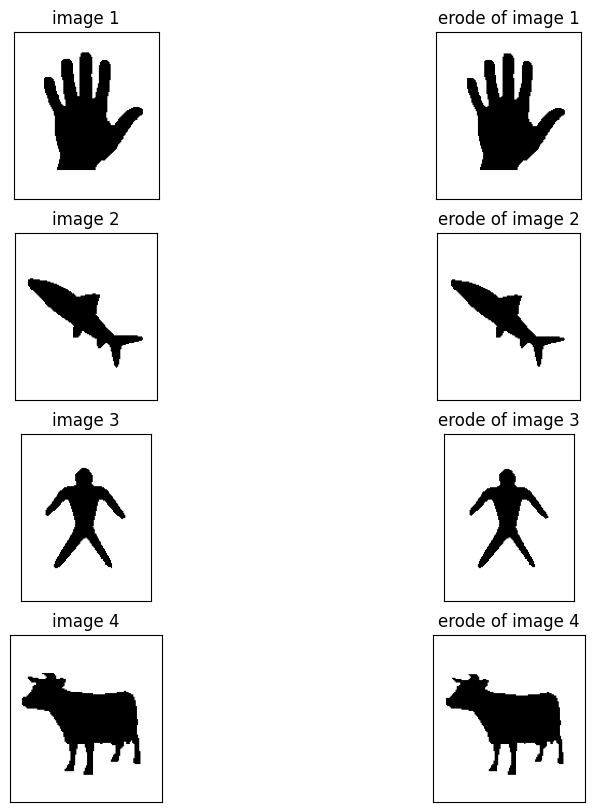

In [39]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-erode')

In [40]:
def open_morphology(img, kernel): 
    '''
    Performs opening morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform opening morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''
    #first erode then dilate
    er_result=erode(img,kernel)
    img_opened=dilate(er_result.astype('uint8'),kernel)
    
    return img_opened

Test your implementatino

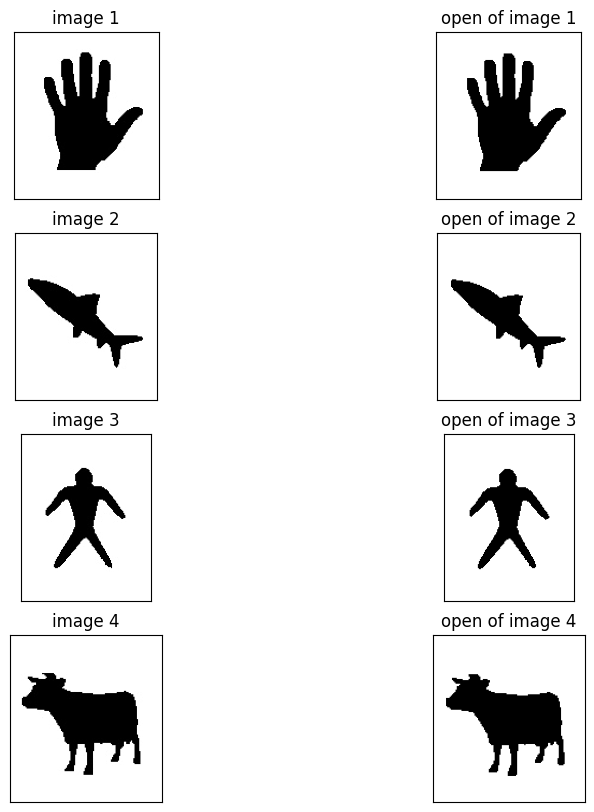

In [41]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-open')

In [42]:
def close_morphology(img, kernel): 
    '''
    Performs closing morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform closing morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    #first dilate then erode
    dilate_result=dilate(img, kernel)
    img_closed=erode(dilate_result.astype('uint8'),kernel)
    
    return img_closed

Test your implemention

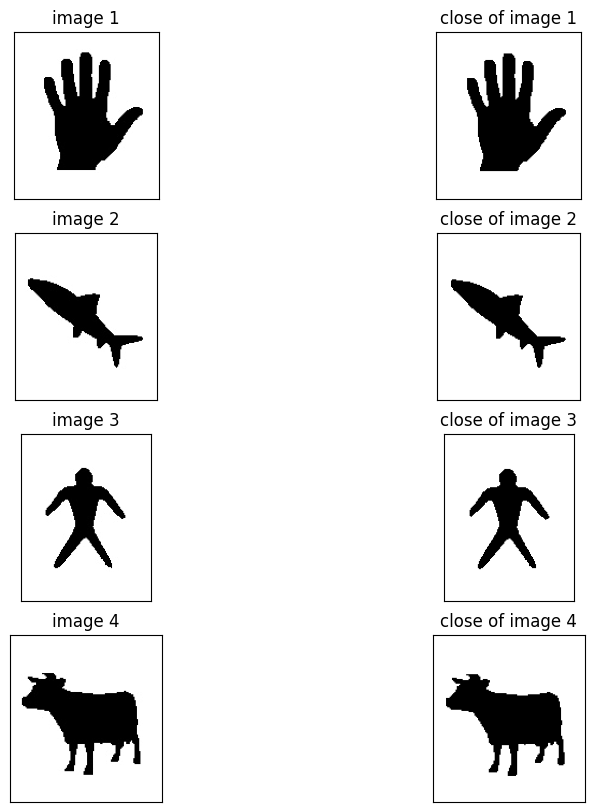

In [43]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-close')

# Part 2

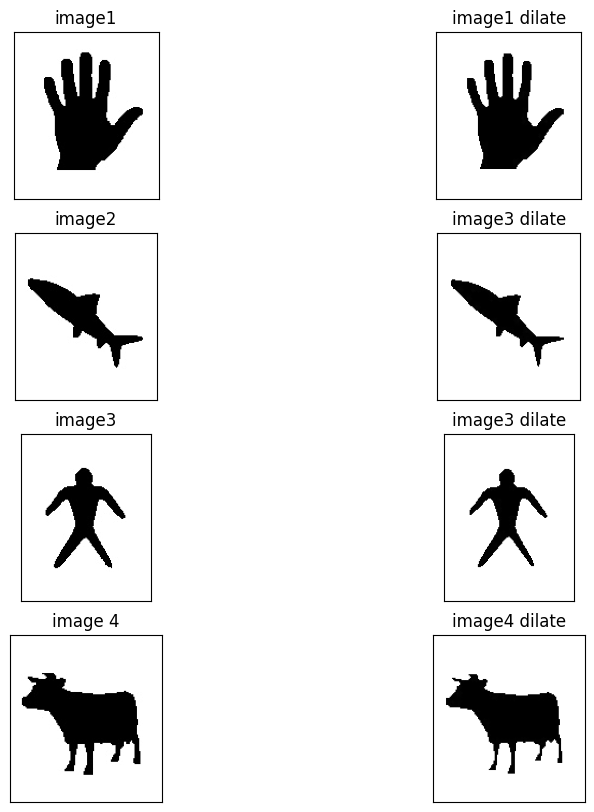

In [44]:
#Write your code here
image_list = []

img1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image1', 'img'])
img1_dlt = cv2.dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8),iterations=1)
image_list.append([img1_dlt, 'image1 dilate','img'])

img2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img2, 'image2', 'img'])
img2_dlt= cv2.dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8),iterations=1)
image_list.append([img2_dlt, 'image3 dilate','img'])

img3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img3, 'image3', 'img'])
img3_dlt = cv2.dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8),iterations=1)
image_list.append([img3_dlt, 'image3 dilate', 'img'])

img4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img4, 'image 4', 'img'])
img4_dlt = cv2.dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8),iterations=1)
image_list.append([img4_dlt, 'image4 dilate', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-dilate-algorithm')


#Like last part, you should make output of each operation separately. Name output image files like this format: Q6-b-dilate, Q6-b-erode

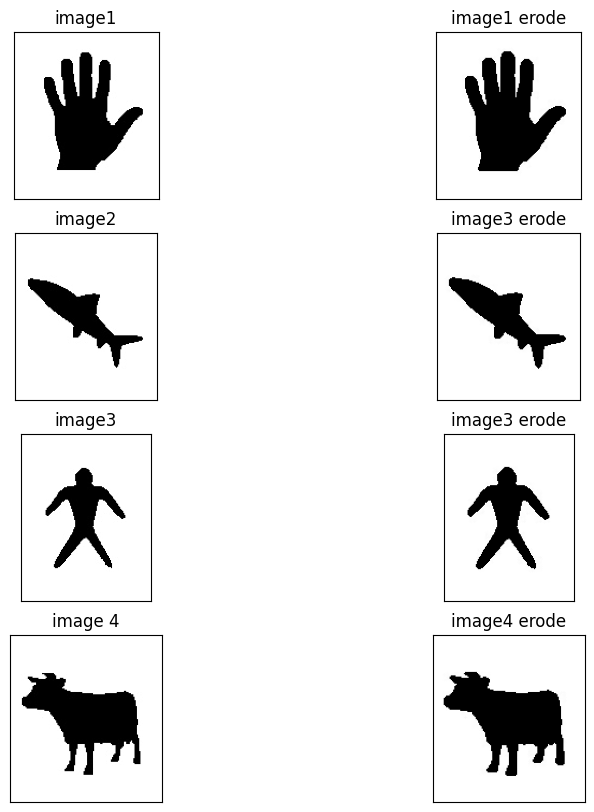

In [45]:
image_list = []

img1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image1', 'img'])
img1_erode = cv2.erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8),iterations=1)
image_list.append([img1_erode, 'image1 erode','img'])

img2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img2, 'image2', 'img'])
img2_erode= cv2.erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8),iterations=1)
image_list.append([img2_erode, 'image3 erode','img'])

img3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img3, 'image3', 'img'])
img3_erode = cv2.erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8),iterations=1)
image_list.append([img3_erode, 'image3 erode', 'img'])

img4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img4, 'image 4', 'img'])
img4_erode = cv2.erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8),iterations=1)
image_list.append([img4_erode, 'image4 erode', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-erode-algorithm')

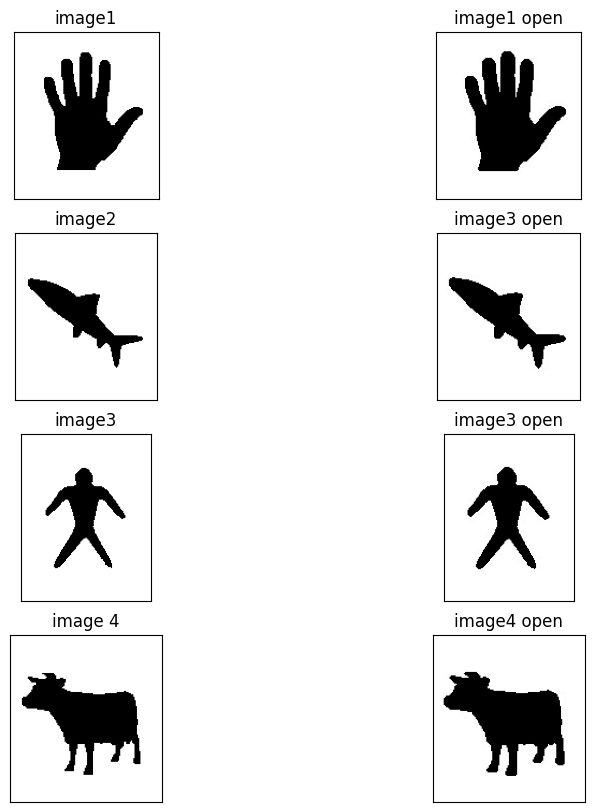

In [46]:
image_list = []

img1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image1', 'img'])
img1_open = cv2.morphologyEx(image1,cv2.MORPH_OPEN,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([img1_erode, 'image1 open','img'])

img2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img2, 'image2', 'img'])
img2_open= cv2.morphologyEx(image2,cv2.MORPH_OPEN,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([img2_erode, 'image3 open','img'])

img3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img3, 'image3', 'img'])
img3_open = cv2.morphologyEx(image3,cv2.MORPH_OPEN,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([img3_erode, 'image3 open', 'img'])

img4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img4, 'image 4', 'img'])
img4_open = cv2.morphologyEx(image4,cv2.MORPH_OPEN,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([img4_erode, 'image4 open', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-open-algorithm')

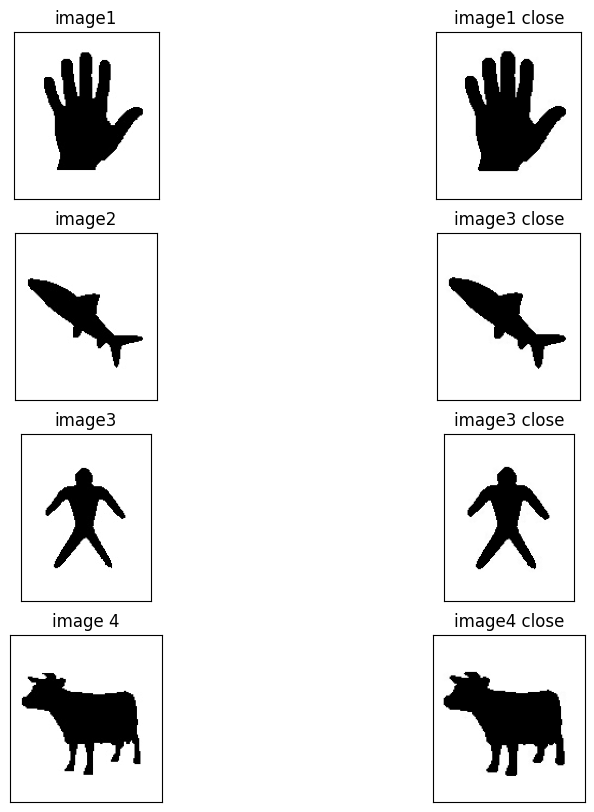

In [47]:
image_list = []

img1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image1', 'img'])
img1_close = cv2.morphologyEx(image1,cv2.MORPH_CLOSE,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([img1_erode, 'image1 close','img'])

img2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img2, 'image2', 'img'])
img2_close= cv2.morphologyEx(image2,cv2.MORPH_CLOSE,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([img2_erode, 'image3 close','img'])

img3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img3, 'image3', 'img'])
img3_close = cv2.morphologyEx(image3,cv2.MORPH_CLOSE,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([img3_erode, 'image3 close', 'img'])

img4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([img4, 'image 4', 'img'])
img4_close= cv2.morphologyEx(image4,cv2.MORPH_CLOSE,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([img4_erode, 'image4 close', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-close-algorithm')

# Part 3: optional
Skeleton of image

In [48]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    res = image.copy()
    
    #Write your code here
    
    
    return res

Test your implementation (don't change this cell).

In [49]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton = get_skeleton(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton= get_skeleton(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton = get_skeleton(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton = get_skeleton(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-c')

TypeError: get_skeleton() takes 1 positional argument but 2 were given

End!!!